# Introduction to Working with Data in Python

### Goals

- Become familiar with basic tools and methods for data munging and cleaning in Python

Tasks

- Learn a little history of Python & Jupyter
- Start an Jupyter Notebook server, create an notebook and navigate around the notebook 
- Perform queries using Python
- Load data from a CSV file into a pandas dataframe 
- Write a function that changes column names to snake_case
- Count and remove missing values
- Fill missing values with an interpolation
- Group and plot data

# Background on Python, Jupyter, and pandas

[Python](https://www.python.org/) is a high-level general purpose programming language named after a [British comedy troup](https://www.youtube.com/user/MontyPython), created by a [Dutch benevolent dictator](http://en.wikipedia.org/wiki/Guido_van_Rossum) and maintained by an international group of fiendly but opinionated Python enthusiasts (`import this!`). 

It's popular for data science because it's powerful, fast, plays well with others, runs everywhere, is easy to learn, highly readable, and open. Because it's general purpose, it can be used for full-stack development. It has a growing list of useful libraries for scientitic programming, data manipulation, and data analysis (NumPy, SciPy, pandas, scikit-learn, StatsModels, matplotlib, PyBrain, etc.).

[Jupyter](http://jupyter.org/) is an enhanced, interactive Python interpreter started as a grad school project by [Fernando Perez](http://fperez.org/). Jupyter notebooks allow you to run a multi-language (Python, R, Julia, Markdown, LaTeX, etc.) interpreter in your browser to create rich, portable, and sharable code documents.

[pandas](http://pandas.pydata.org/) is a libary created by [Wes McKinney](http://blog.wesmckinney.com/) that introduces the R-like dataframe object to Python, and makes working with data in Python a lot easier.

## Getting started with Jupyter Notebooks

To start up an Jupyter notebook server, simply navigate to the directory where you want the notebooks to be saved and run the command

```
jupyter notebook
```

A browser should open with a notebook navigator. Click the "New" button and select "Python 2" or "Python 3".

A beautiful blank notebook should open in a new tab.

Name the notebook by clicking on "Untitled" at the top of the page.

Notebooks are sequences of cells. Cells can be markdown, code, or raw text. Change the first cell to markdown and briefly describe what you are going to do in the notebook. 

## Getting started with pandas

We start by importing the libraries we're going to use: `pandas` and `matplotlib`

In [1]:
import pandas as pd
%matplotlib inline

## Loading data into a DataFrame

The pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes. It's basically a spreadsheet you can program and it's an incredibly useful Python object for data analysis. 

You can load data into a dataframe using pandas' excellent `read_*` functions.

We're going to try two of them: read_csv and read_sql.

*Pro tip*: Jupyter will output the docstring (i.e., source code comments) for a command just by asking it a question.

In [2]:
pd.read_sql?
pd.read_csv?

Now let's read data in from a CSV file:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/hypothyroid.csv')

## Viewing your dataframe

You can use `head` and `tail` to get a view of your data.

In [4]:
df.head()
df.tail(3)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
3160,77,M,f,f,f,f,f,f,f,f,...,0.6,y,71,y,0.68,y,104,n,NaN,negative
3161,74,F,f,f,f,f,f,f,f,f,...,0.1,y,65,y,0.48,y,137,n,NaN,negative
3162,56,F,t,f,f,f,f,f,f,f,...,1.8,y,139,y,0.97,y,143,n,NaN,negative


We can get a sense for the size and shape of the data using `shape`

In [5]:
df.shape

(3163, 26)

Get a sense for the type of each column using `dtypes`:

In [6]:
df.dtypes

Age                          float64
Sex                           object
On Thyroxine                  object
Query on Thyroxine            object
On Antithyroid Medication     object
Thyroid Surgery               object
Query Hypothyroid             object
Query Hyperthyroid            object
Pregnant                      object
Sick                          object
Tumor                         object
Lithium                       object
Goitre                        object
TSH Measured                  object
TSH                          float64
T3 Measured                   object
T3                           float64
TT4 Measured                  object
TT4                          float64
T4U Measured                  object
T4U                          float64
FTI Measured                  object
FTI                          float64
TBG Measured                  object
TBG                          float64
Class                         object
dtype: object

## Cleaning up column names

Notice that the column names have spaces. 

In [7]:
df.columns

Index(['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Thyroid Surgery', 'Query Hypothyroid',
       'Query Hyperthyroid', 'Pregnant', 'Sick', 'Tumor', 'Lithium', 'Goitre',
       'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4',
       'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG',
       'Class'],
      dtype='object')

That's a bummer, because columns without spaces in their names allow us to take a shortcut in selecting columns. 

Instead of referencing columns like this

```
df['On Antithyroid Medication']
```

we would love to be able to use tab completion and reference the columns like this

```
df.on_antithyroid_medication
```

Let's fix it, and learn a little about defining Python functions, real expressions, and list comprehension in the process.

In [8]:
import re

def spaces_to_snake(column_name):
    """
    Converts a string that has spaces into snake_case.

    Example:
        print camel_to_snake("I LOVE DATA SCIENCE")
        > I_LOVE_DATA_SCIENCE

    To see how to apply this to camel case, see:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s = re.sub(r"\s+", '_', column_name)
    return s.lower()

df.columns = [spaces_to_snake(col) for col in df.columns]

#Note that there are more elegant and "Pythonic" ways to do this.

In [9]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg',
       'class'],
      dtype='object')

In [10]:
df.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                          float64
class                         object
dtype: object

Great. Now we can to reference columns using `df.variable_name` syntax.


In [11]:
df.on_antithyroid_medication.head()

0    f
1    f
2    f
3    f
4    f
Name: on_antithyroid_medication, dtype: object

## Basic views into the data

Lets get a better sense what these fields look like. 

Let's start by describing the entire dataset using the describe command.

In [12]:
df.describe()

,age,tsh,t3,tt4,t4u,fti,tbg
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


It looks like `describe` only works on numerical columns. For categorical data, we can use `value_counts`.

In [13]:
pd.value_counts(df.on_thyroxine)

f    2702
t     461
Name: on_thyroxine, dtype: int64

Let's see if there are missing values for age in this dataset.

In [14]:
pd.value_counts(df.age.isnull())

False    2717
True      446
Name: age, dtype: int64

What if we wanted to fill or drop the missing values? We can use `fillna` and `dropna`

In [15]:
df.age = df.age.fillna(-1)

In [16]:
pd.value_counts(df.age.isnull())

False    3163
Name: age, dtype: int64

## Selecting and Subsetting Data

Let's say we just wanted to work with the cases where the individual's age is unrecorded. We can subset using conditional logic.

In [17]:
df[df.age==-1].head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,class
26,-1,M,f,f,f,t,f,f,f,f,...,1.0,y,32.0,y,0.78,y,41.0,n,NaN,hypothyroid
44,-1,F,f,f,f,f,f,f,f,f,...,1.4,y,78.0,y,0.98,y,80.0,n,NaN,hypothyroid
50,-1,F,f,f,f,f,f,f,f,f,...,0.4,y,9.7,y,1.46,y,6.6,n,NaN,hypothyroid
59,-1,NaN,f,f,f,f,f,f,f,f,...,0.6,y,21.0,y,0.97,y,22.0,n,NaN,hypothyroid
61,-1,F,f,f,f,f,f,f,f,f,...,0.3,y,18.0,y,1.06,y,17.0,n,NaN,hypothyroid


We can also subset using indexing like R.

You can slice a Series by range using the [] operator

In [18]:
df.age[3:10]

3    24
4    77
5    85
6    64
7    72
8    20
9    42
Name: age, dtype: float64

Or by location in the DataFrame using the `.iloc` method

In [19]:
df.iloc[3:10,0:4]

,age,sex,on_thyroxine,query_on_thyroxine
3,24,F,f,f
4,77,M,f,f
5,85,F,f,f
6,64,F,f,f
7,72,F,f,f
8,20,F,f,f
9,42,F,f,f


The `.ix` method supports lookup by label as well as integers.

## Exporting data

Pandas supports saving DataFrames to a variety of file formats using the `to_*` function. Let's save our updated data as a csv.

In [20]:
df.to_csv("hypothyroid_1.csv")

## Groupby

Often we want to examine difference among groups based on categorical values. For this `groupby` is incredibly valuable

In [21]:
df[['age', 'sex', 'tsh']].groupby("sex").mean()

,age,tsh
sex,,
F,44.605866,6.536341
M,44.685022,4.547664


## Data munging functions

pandas provides a variety of other useful functions, including:

```
pivot
pivot_tables
stack/unstack
melt
get_dummies
factorize
```

## Grouping and plotting!

In [22]:
grouped = df[['age', 'tsh']].groupby("age").mean()

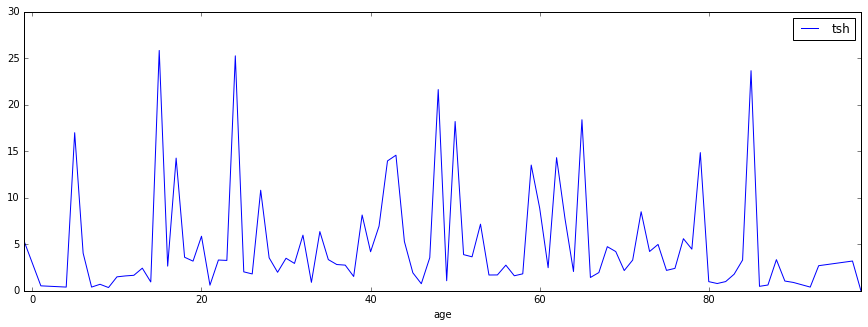

In [23]:
grouped.plot(figsize=(15,5))